In [ ]:
!pip install -q spectral

In [ ]:
# Bibliotecas
from osgeo import ogr
from osgeo import gdal
from spectral import imshow
import tifffile as tif

In [ ]:
# Leitura dos arquivos
raster = gdal.Open('/content/cubo_L7.tif')
vetor = ogr.Open('/content/poly.gpkg')

In [ ]:
# Pegando informação do vetor
layer = vetor.GetLayer()

In [ ]:
# Armazenando parâmetros cartográficos
transform = raster.GetGeoTransform()

In [ ]:
# Criando o raster
driver = gdal.GetDriverByName('GTiff')
raster_vetor = driver.Create('poly.tif',raster .RasterXSize, 
                             raster .RasterYSize,1, gdal.GDT_UInt16)
raster_vetor.SetGeoTransform(transform)

In [ ]:
# Populando raster com o vetor
gdal.RasterizeLayer(raster_vetor, [1], layer,options=['ATTRIBUTE=id'])
raster_vetor.GetRasterBand(1).SetNoDataValue(0.0)
raster_vetor = None

In [ ]:
# Lendo resultados
img = tif.imread('/content/cubo_L7.tif')
poly = tif.imread('poly.tif')

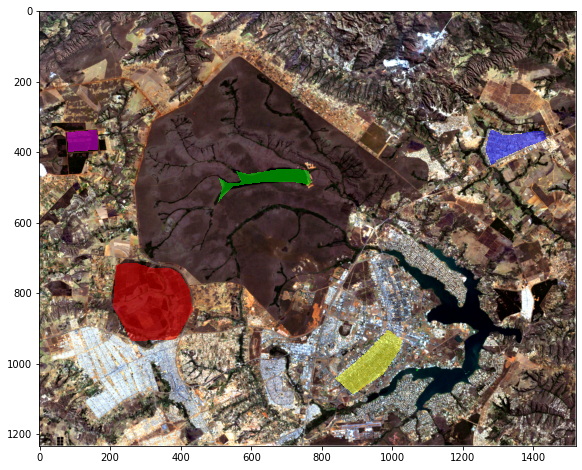

In [ ]:
# Visualizando resultados
view = imshow(img, (2,1,0),classes=poly, stretch=(0.02,0.98),figsize=(12,8))
view.set_display_mode('overlay')